**Projeto Aplicado - Análise Preditiva e Vantagem Competitiva**

Trabalho Final (70%)

Professor Sergio Monteiro

**Aluno: Victor dos Santos Correa Barbosa**

**Escopo** do trabalho: montar um portfólio com 10 ativos financeiros 

**INSTALAÇÃO DOS PACTOES**

In [ ]:
# Instalando a API do yahoo finance para me trazer os dados das ações
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install requests #para fazer web scrapping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas #atualizar a biblio do pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importando as bibliotecas necessárias para mexer com o dataframe, matriz, fazer plots, etc.**

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

**Baixar os dados reais**

vou pegar as últimas 10 ações listadas e jogar num dataframe em texto

In [ ]:
import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.tail(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
698,COCA COLA,COCA34,Refrigerantes,EUA
699,COLGATE,COLG34,Produtos Pessoais,EUA
700,MASTERCARD,MSCD34,Financiamento ao Consumidor,EUA
701,NIKE,NIKE34,Calçados,EUA
702,ORACLE,ORCL34,Software aplicativo,EUA
703,RAYTHEON TECH,RYTT34,Industrial,EUA
704,SCHLUMBERGER,SLBG34,Equipamentos e Serviços de Combustível,EUA
705,TIFFANY,TIFF34,Joalheria,EUA
706,US BANCORP,USBC34,Instituição Financeira,EUA
707,XP INC,XPBR31,Financeiro,Brasil


In [ ]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  CÓDIGO                                   SETOR  \
0               3M  MMMC34                 Indústria diversificada   
1         AB INBEV  ABUD34                                 Bebidas   
2          ABB LTD  A1BB34                              Industrial   
3           ABBOTT  ABTT34                           Farmacêuticos   
4           ABBVIE  ABBV34          Medicamentos e Outros Produtos   
..             ...     ...                                     ...   
703  RAYTHEON TECH  RYTT34                              Industrial   
704   SCHLUMBERGER  SLBG34  Equipamentos e Serviços de Combustível   
705        TIFFANY  TIFF34                               Joalheria   
706     US BANCORP  USBC34                  Instituição Financeira   
707         XP INC  XPBR31                              Financeiro   

    PAÍS DE ORIGEM  
0              EUA  
1          Bélgica  
2      Switzerland  
3              EUA  
4              EUA  
..             ...  
703         

In [ ]:
dados_series = yf.download(["COCA34.SA","COLG34.SA","MSCD34.SA", "NIKE34.SA", "ORCL34.SA", "RYTT34.SA", "SLBG34.SA","MMMC34.SA", "USBC34.SA", "ABTT34.SA"], start="2018-01-01", end="2022-01-01")

[*********************100%***********************]  10 of 10 completed


In [ ]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

            Adj Close                                                          \
            ABTT34.SA  COCA34.SA  COLG34.SA   MMMC34.SA  MSCD34.SA  NIKE34.SA   
Date                                                                            
2018-01-02  14.645771  21.591040  31.710255  162.236115  15.752896  20.141281   
2018-01-03  14.769363  21.446625  31.142542  162.287033  15.662003  20.141281   
2018-01-04  14.707567  21.576601  31.271097  163.815643  15.662003  19.446751   
2018-01-05  14.738467  21.446625  31.007612  164.070419  15.662003  19.741688   
2018-01-08  14.738467  21.576601  31.007612  165.089493  15.687785  19.884398   
...               ...        ...        ...         ...        ...        ...   
2021-12-23  64.583145  53.536552  65.274170  236.358749  65.665932  93.039177   
2021-12-27  65.297791  53.633724  65.342094  235.449188  64.832062  93.573364   
2021-12-28  64.969978  53.828045  66.079544  237.656738  65.070328  92.861115   
2021-12-29  66.317307  54.70

In [ ]:
#vamos estudar os valores de fechamento - entao vamos doprar as demais colunas
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 

In [ ]:
df.head()

Close                                                          \
            ABTT34.SA  COCA34.SA  COLG34.SA   MMMC34.SA  MSCD34.SA  NIKE34.SA   
Date                                                                            
2018-01-02  15.800000  24.916666  35.588570  191.039993  16.212902  21.170000   
2018-01-03  15.933333  24.750000  34.951427  191.100006  16.119354  21.170000   
2018-01-04  15.866666  24.900000  35.095715  192.899994  16.119354  20.440001   
2018-01-05  15.900000  24.750000  34.799999  193.199997  16.119354  20.750000   
2018-01-08  15.900000  24.900000  34.799999  194.399994  16.119354  20.900000   

                                                         
            ORCL34.SA  RYTT34.SA   SLBG34.SA  USBC34.SA  
Date                                                     
2018-01-02  25.283333  70.500000  112.750000  44.799999  
2018-01-03  25.283333  70.383331  115.735001  44.349998  
2018-01-04  25.916666  70.383331  117.150002  44.625000  
2018-01-05  26.083332  70.383331  118.144997  44.625000  
2018-01-08  26.400000  72.050003  120.199997  44.950001

In [ ]:
df['Close']['COCA34.SA']

Date
2018-01-02    24.916666
2018-01-03    24.750000
2018-01-04    24.900000
2018-01-05    24.750000
2018-01-08    24.900000
                ...    
2021-12-23    55.099998
2021-12-27    55.200001
2021-12-28    55.400002
2021-12-29    56.299999
2021-12-30    54.290001
Name: COCA34.SA, Length: 989, dtype: float64

In [ ]:
y=[]    #lista y
for a in df['Close']['COCA34.SA']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)     #lista x sendo usada como marcador de tempo

**Padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)     #transformando os dados de 0 a 1

**Visualização da Série**

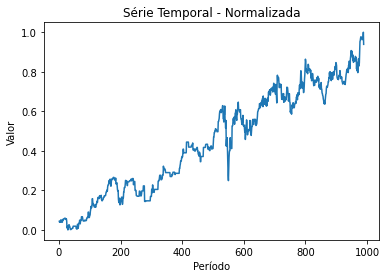

In [ ]:
plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))     #zip é para juntar os dados x e y
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

treino[1]: [1.         0.04367697]
treino[2]: [2.         0.03859827]
treino[3]: [3.        0.0431691]
treino[4]: [4.         0.03859827]
treino[5]: [5.        0.0431691]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):   #look back por causa da defasagem 
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
look_back = 2                                               #preparando os dados de treino e teste
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada                   # apenas 1 característica porque só vou usar a precificação
x_treino = x_treino.reshape((x_treino.shape[0],              # seguindo organizando os dados
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

treino[1]: [[0.04367697]
 [0.03859827]] -> 0.0431691033457899
treino[2]: [[0.03859827]
 [0.0431691 ]] -> 0.03859826668210369
treino[3]: [[0.0431691 ]
 [0.03859827]] -> 0.0431691033457899
treino[4]: [[0.03859827]
 [0.0431691 ]] -> 0.05078718382571409
treino[5]: [[0.0431691 ]
 [0.05078718]] -> 0.05078718382571409


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf                          #tensorflow framework importante
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20                                          #hiperparametros. vou variar o número de épocas em cada ação. tem que tomar cuidado para o modelo nao 'desaprender' se aumentarmos muito.
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.      #valores randomicos
modelo = Sequential()                                                                           #montei o meu modelo sequencial
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))                              #não vou mudar esse dropout. 
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_50 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_101 (LSTM)             (None, 128)               117248    
                                                                 
 dense_50 (Dense)            (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:
historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.058237,0.250917
1,0.020839,0.110575
2,0.007010,0.032415
3,0.014303,0.029735
4,0.011905,0.045296


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

4/4 [==============================] - 0s 7ms/step - loss: 0.0019
loss: 0.0019025927176699042


**Visualização do Processo de Aprendizado**

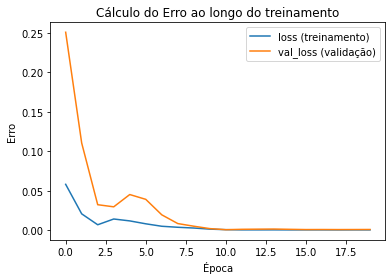

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

7/7 [==============================] - 1s 5ms/step


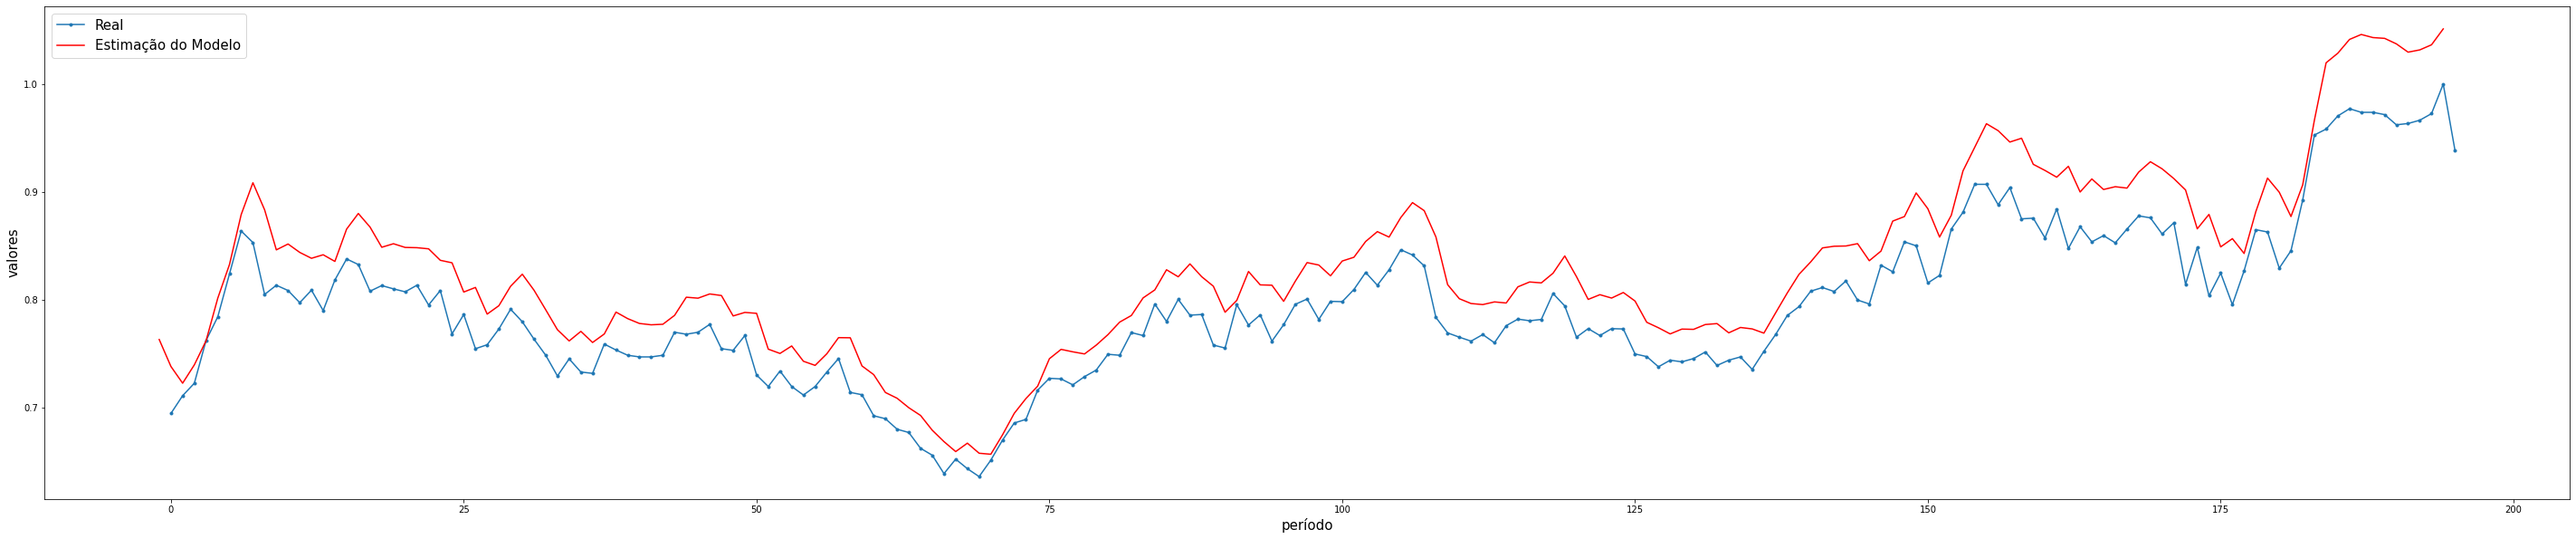

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

**Fazendo Predições**

In [ ]:
len(valores_reais_y)


196

In [ ]:
len(lst_dados_predicao)

196

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.97257498],
       [1.        ]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 1s/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.29728922]
 [0.30524287]]


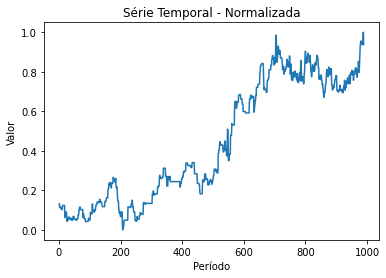

treino[1]: [1.         0.13243648]
treino[2]: [2.         0.11608812]
treino[3]: [3.         0.11979037]
treino[4]: [4.         0.11220265]
treino[5]: [5.         0.11220265]
treino[1]: [[0.13243648]
 [0.11608812]] -> 0.11979037050990499
treino[2]: [[0.11608812]
 [0.11979037]] -> 0.11220264588616759
treino[3]: [[0.11979037]
 [0.11220265]] -> 0.11220264588616759
treino[4]: [[0.11220265]
 [0.11220265]] -> 0.11220264588616759
treino[5]: [[0.11220265]
 [0.11220265]] -> 0.11220264588616759
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_51 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_103 (LSTM)             (None, 128)               117248    
                         

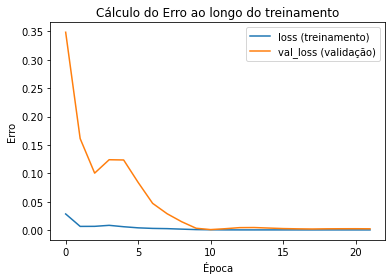

7/7 [==============================] - 2s 6ms/step


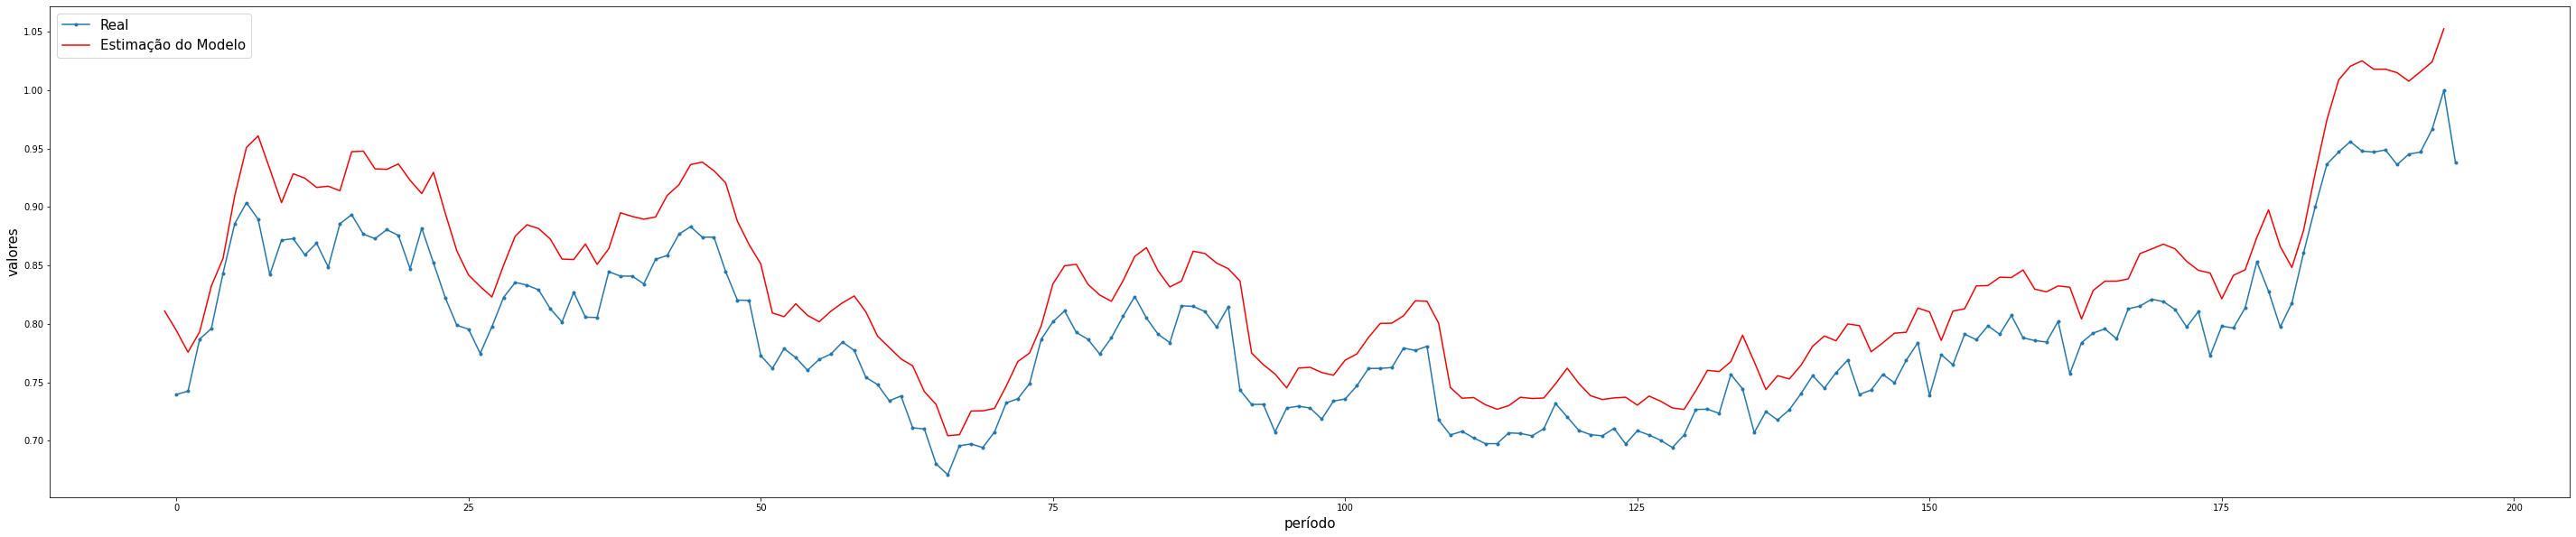

1/1 [==============================] - 1s 1s/step
minha predição é: [[0.30895844]
 [0.31936923]]


In [ ]:
df['Close']['COLG34.SA']

y=[]
for a in df['Close']['COLG34.SA']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 22
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

modelo.summary()
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

hist = pd.DataFrame(historico.history)
hist.head()

loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

len(valores_reais_y)


len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0


minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')





Professor, tentei muito fazer com "for", ou seja, o jeito inteligente, mas não consegui..mesmo consultando os colegas ficou difícil codar. 
mas o conceito ficou claríssimo!!! irei fazer ação por ação. 

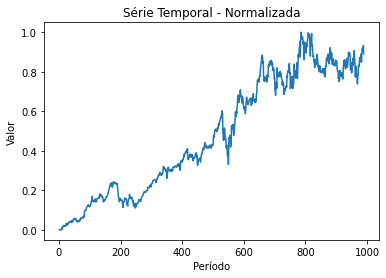

treino[1]: [1.         0.00171866]
treino[2]: [2. 0.]
treino[3]: [3. 0.]
treino[4]: [4. 0.]
treino[5]: [5. 0.]
treino[1]: [[0.00171866]
 [0.        ]] -> 0.0
treino[2]: [[0.]
 [0.]] -> 0.0
treino[3]: [[0.]
 [0.]] -> 0.0
treino[4]: [[0.]
 [0.]] -> 0.0
treino[5]: [[0.]
 [0.]] -> 0.0
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_104 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_52 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_105 (LSTM)             (None, 128)               117248    
                                                                 
 dense_52 (Dense)            (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable par

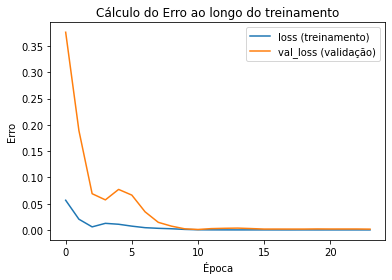

7/7 [==============================] - 1s 6ms/step


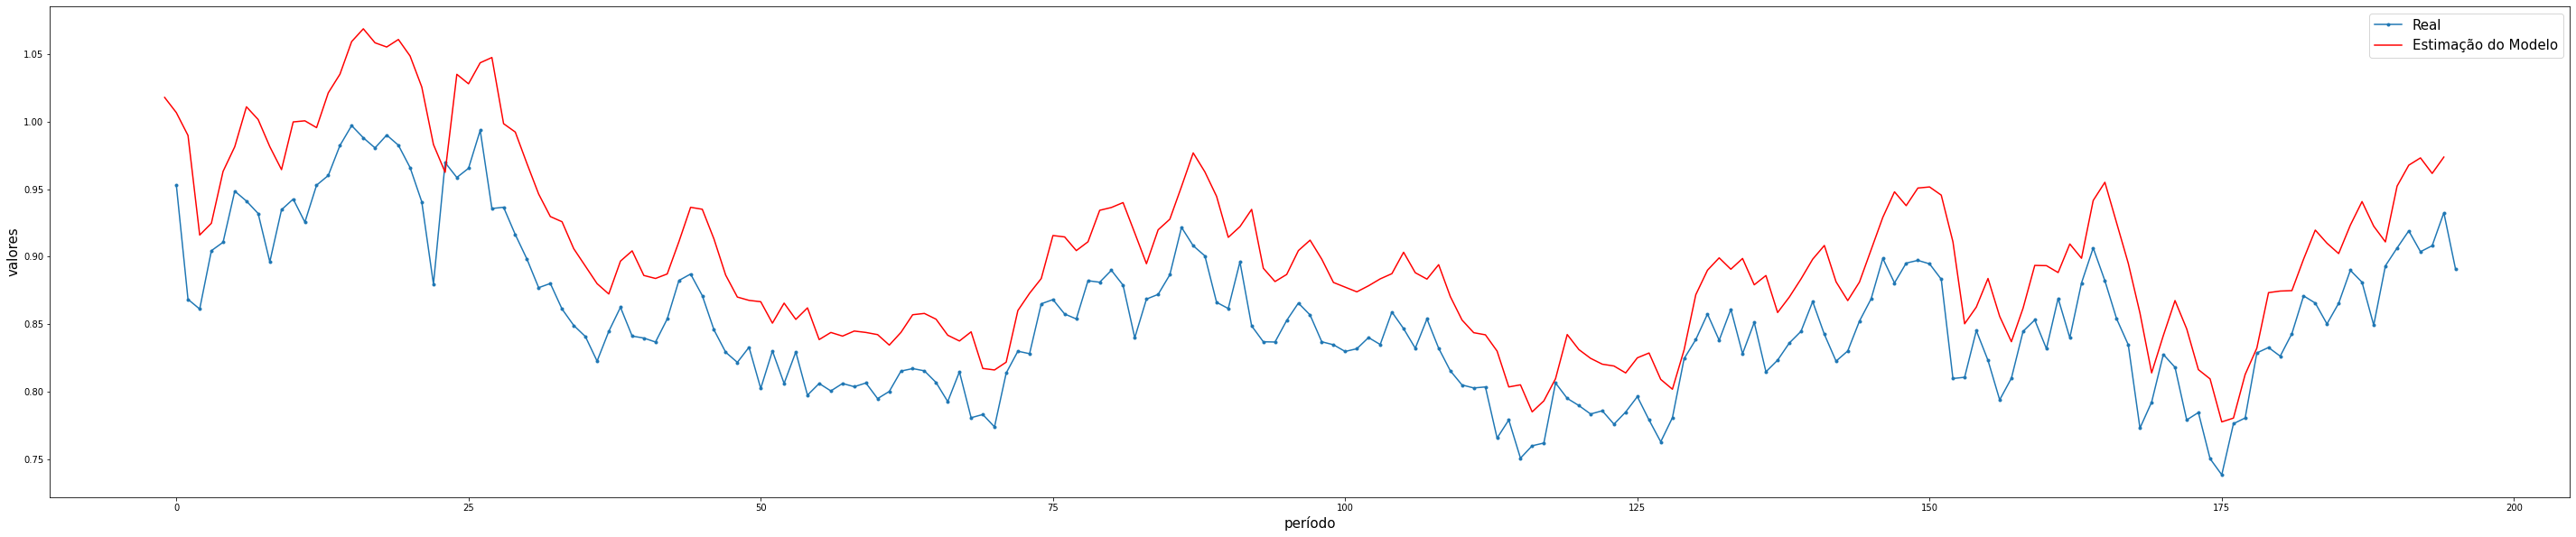

1/1 [==============================] - 1s 1s/step
minha predição é: [[0.2851231 ]
 [0.29230076]]


In [ ]:
df['Close']['MSCD34.SA']

y=[]
for a in df['Close']['MSCD34.SA']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 24
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

modelo.summary()
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

hist = pd.DataFrame(historico.history)
hist.head()

loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

len(valores_reais_y)


len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0


minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')





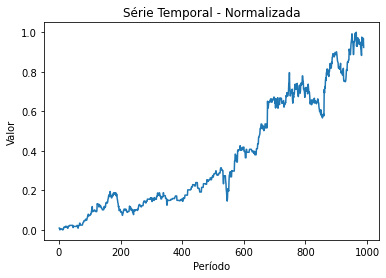

treino[1]: [1.         0.00941356]
treino[2]: [2.         0.00941356]
treino[3]: [3.00000000e+00 1.27213189e-04]
treino[4]: [4.         0.00407073]
treino[5]: [5.         0.00597887]
treino[1]: [[0.00941356]
 [0.00941356]] -> 0.00012721318921500024
treino[2]: [[0.00941356]
 [0.00012721]] -> 0.004070725001140381
treino[3]: [[0.00012721]
 [0.00407073]] -> 0.005978874312495572
treino[4]: [[0.00407073]
 [0.00597887]] -> 0.005978874312495572
treino[5]: [[0.00597887]
 [0.00597887]] -> 0.005978874312495572
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_106 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_53 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_107 (LSTM)             (None, 128)               117248    
          

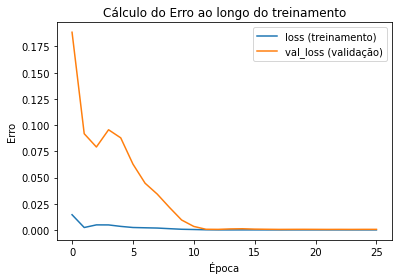

7/7 [==============================] - 1s 8ms/step


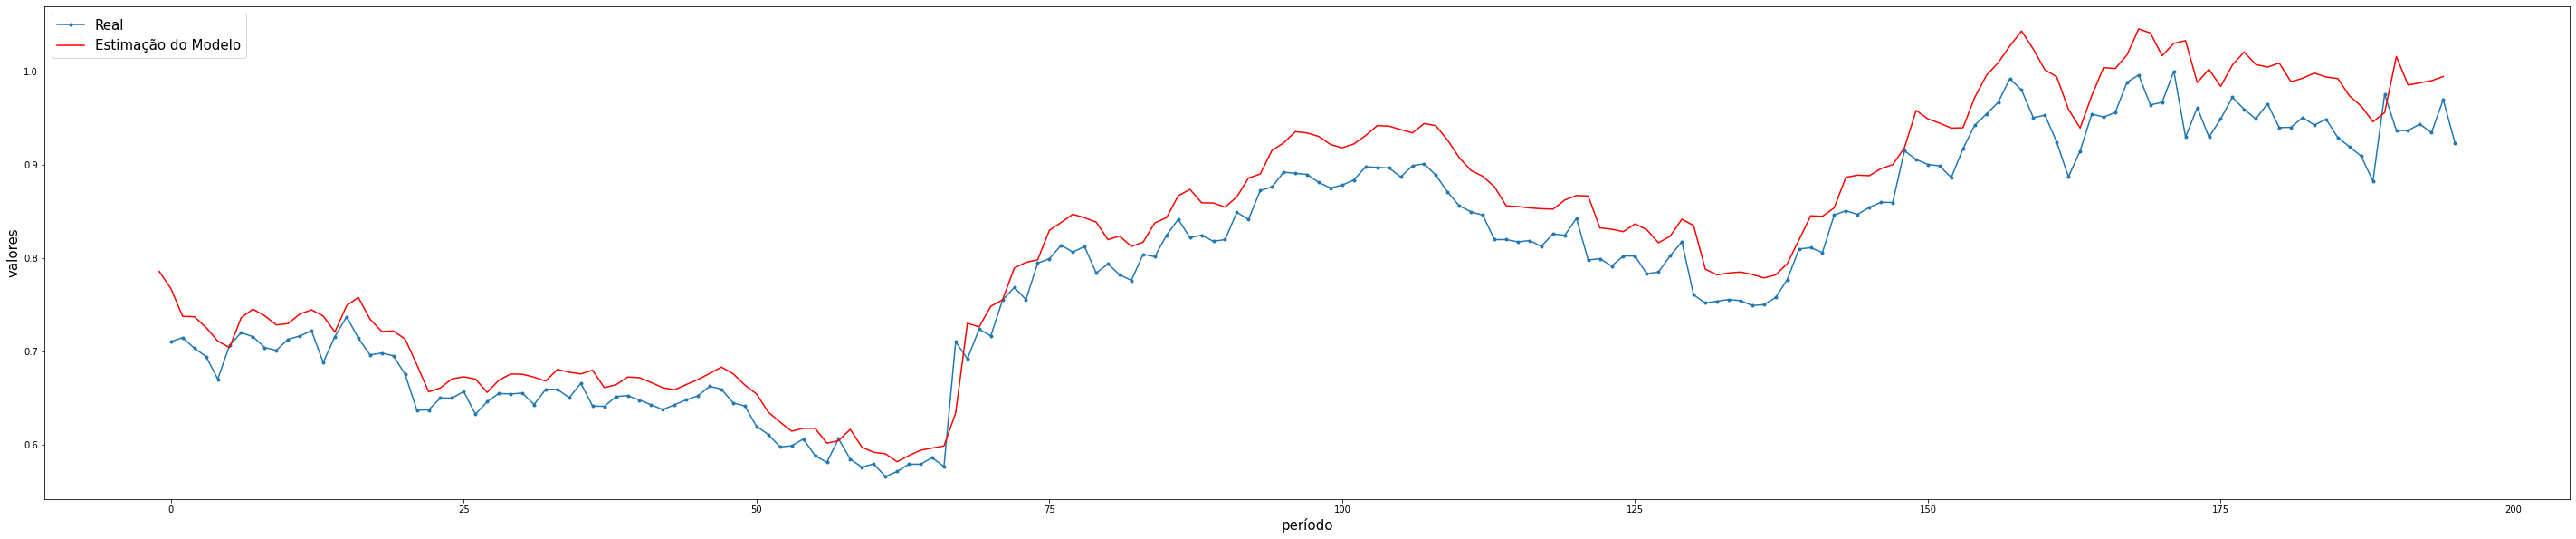

1/1 [==============================] - 2s 2s/step
minha predição é: [[0.29847178]
 [0.30933368]]


In [ ]:
df['Close']['NIKE34.SA']

y=[]
for a in df['Close']['NIKE34.SA']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 26
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

modelo.summary()
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

hist = pd.DataFrame(historico.history)
hist.head()

loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

len(valores_reais_y)


len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0


minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')





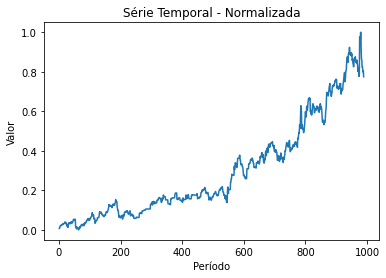

treino[1]: [1.         0.00763845]
treino[2]: [2.         0.00763845]
treino[3]: [3.         0.01630297]
treino[4]: [4.        0.0185831]
treino[5]: [5.         0.02291537]
treino[1]: [[0.00763845]
 [0.00763845]] -> 0.016302970936567813
treino[2]: [[0.00763845]
 [0.01630297]] -> 0.018583099980270246
treino[3]: [[0.01630297]
 [0.0185831 ]] -> 0.02291537386682106
treino[4]: [[0.0185831 ]
 [0.02291537]] -> 0.02291537386682106
treino[5]: [[0.02291537]
 [0.02291537]] -> 0.02223134298194202
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_108 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_54 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_109 (LSTM)             (None, 128)               117248    
                         

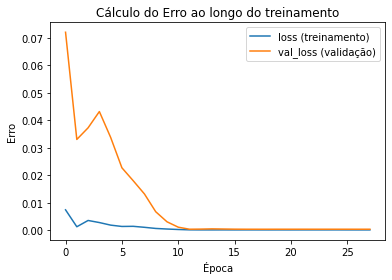

7/7 [==============================] - 1s 5ms/step


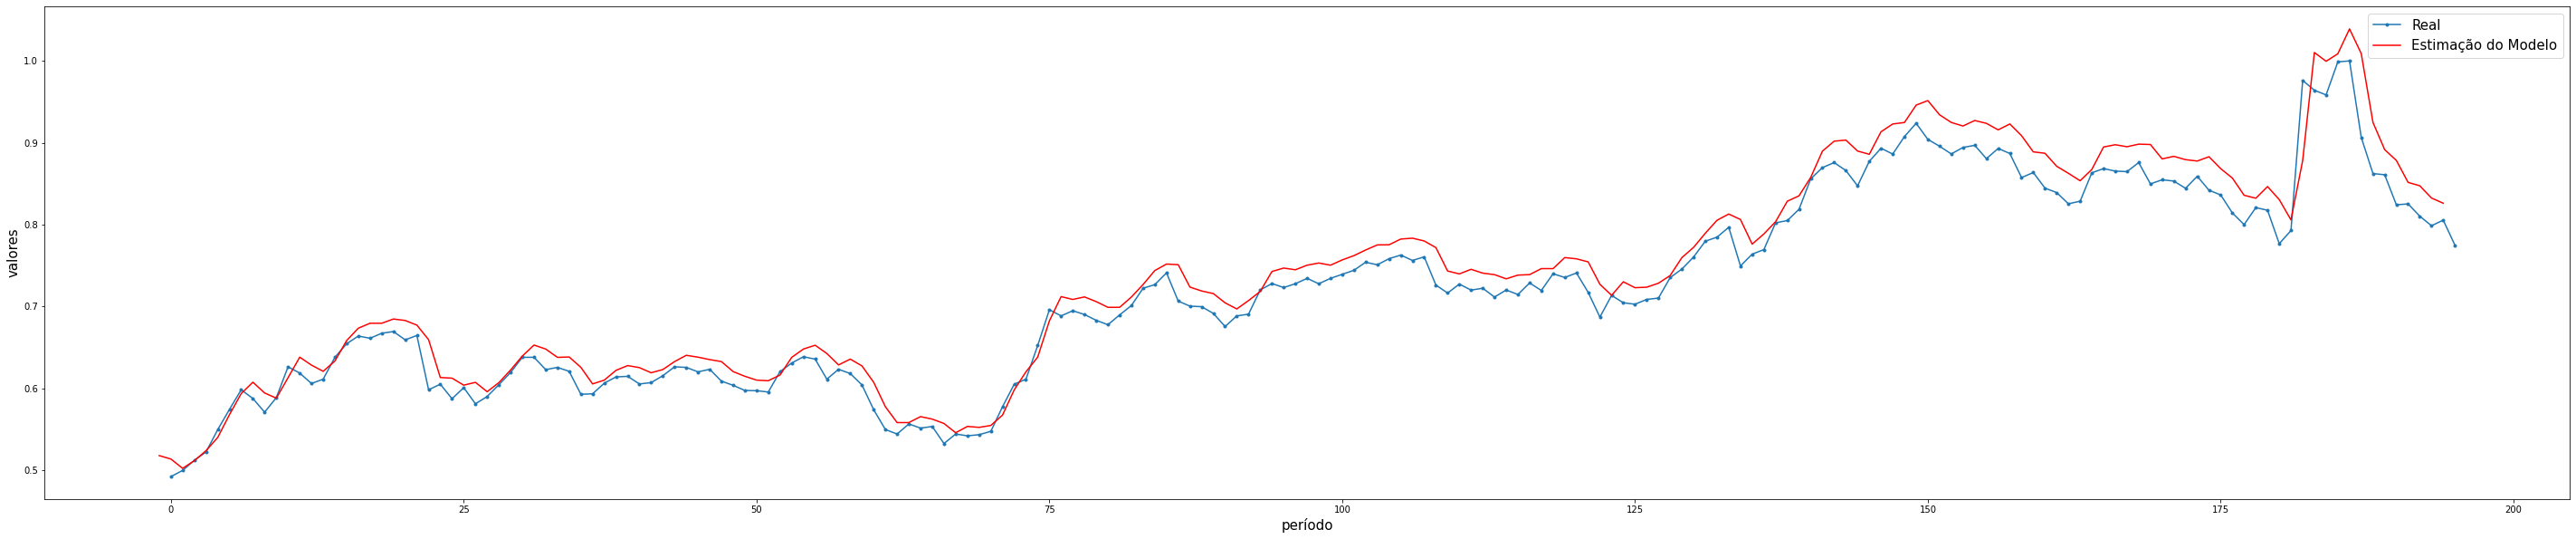

1/1 [==============================] - 1s 1s/step
minha predição é: [[0.26690805]
 [0.26908308]]


In [ ]:
df['Close']['ORCL34.SA']

y=[]
for a in df['Close']['ORCL34.SA']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 28
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

modelo.summary()
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

hist = pd.DataFrame(historico.history)
hist.head()

loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

len(valores_reais_y)


len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0


minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')





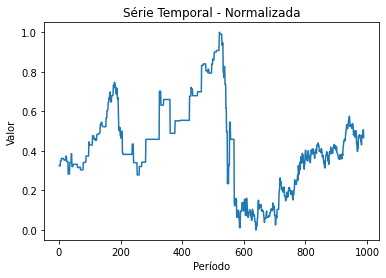

treino[1]: [1.         0.32552695]
treino[2]: [2.         0.32368496]
treino[3]: [3.         0.32368496]
treino[4]: [4.         0.32368496]
treino[5]: [5.         0.34999875]
treino[1]: [[0.32552695]
 [0.32368496]] -> 0.3236849594052915
treino[2]: [[0.32368496]
 [0.32368496]] -> 0.3236849594052915
treino[3]: [[0.32368496]
 [0.32368496]] -> 0.34999875028344474
treino[4]: [[0.32368496]
 [0.34999875]] -> 0.34999875028344474
treino[5]: [[0.34999875]
 [0.34999875]] -> 0.34999875028344474
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_110 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_55 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_111 (LSTM)             (None, 128)               117248    
                           

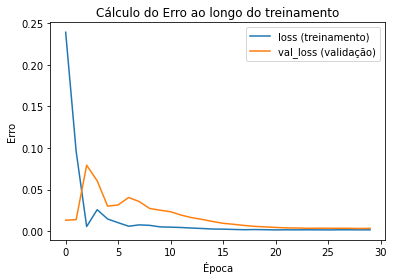

7/7 [==============================] - 1s 5ms/step


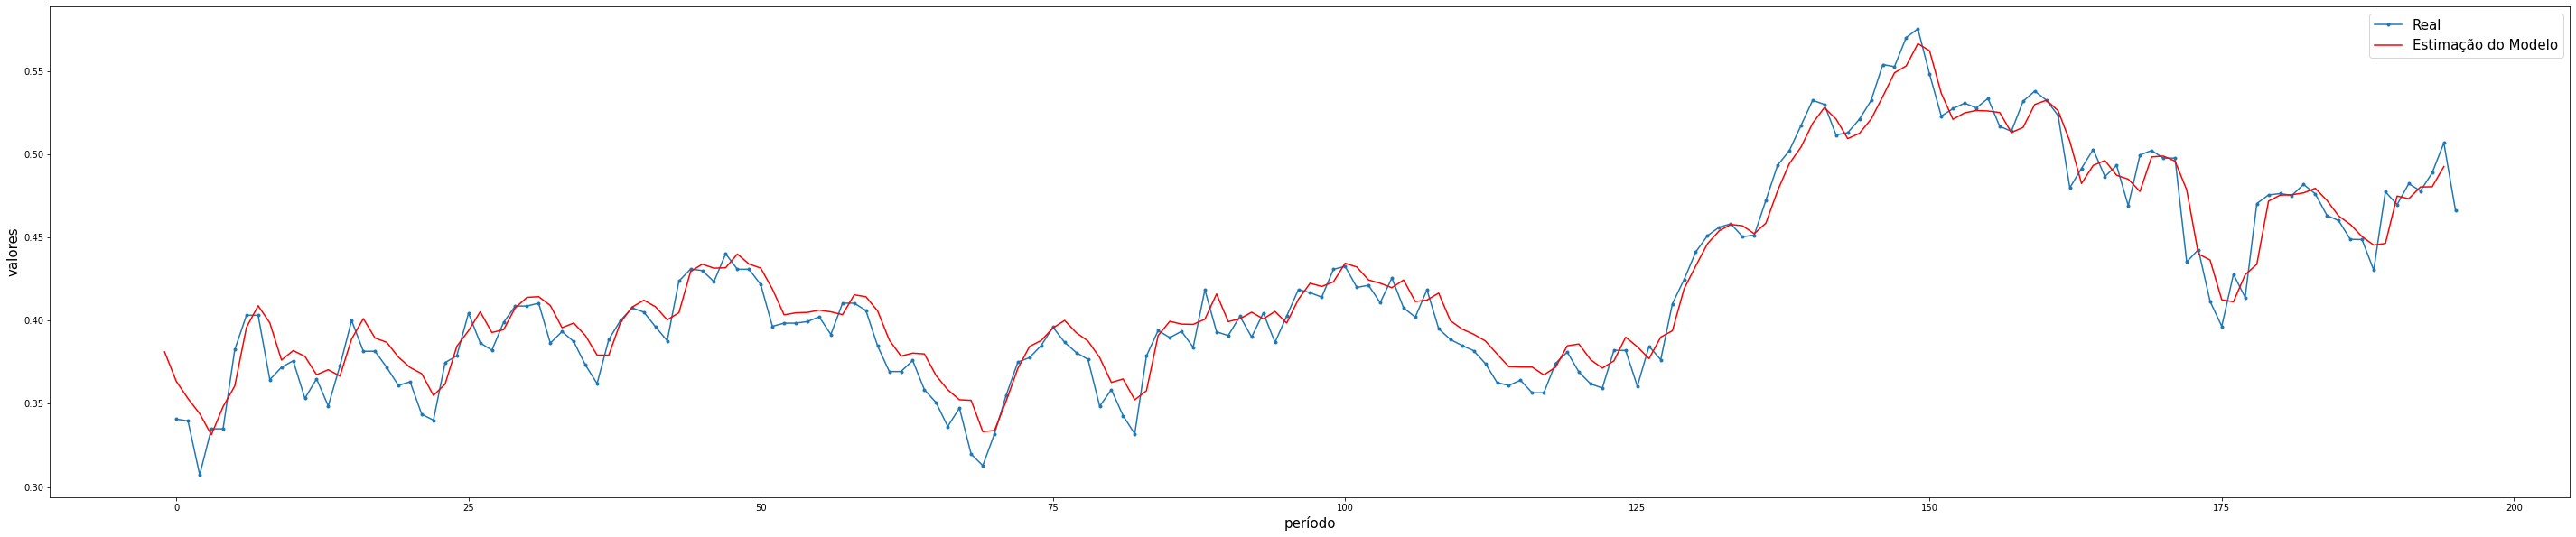

1/1 [==============================] - 1s 1s/step
minha predição é: [[0.16746455]
 [0.17181689]]


In [ ]:
df['Close']['RYTT34.SA']

y=[]
for a in df['Close']['RYTT34.SA']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 30
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

modelo.summary()
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

hist = pd.DataFrame(historico.history)
hist.head()

loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

len(valores_reais_y)


len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0


minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')





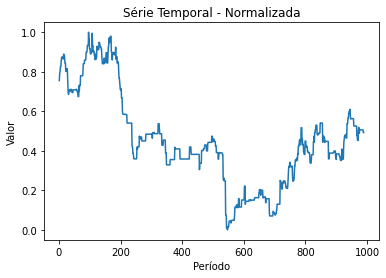

treino[1]: [1.        0.7552257]
treino[2]: [2.         0.78371669]
treino[3]: [3.         0.79722247]
treino[4]: [4.         0.80671942]
treino[5]: [5.         0.82633381]
treino[1]: [[0.7552257 ]
 [0.78371669]] -> 0.797222469407054
treino[2]: [[0.78371669]
 [0.79722247]] -> 0.8067194158288558
treino[3]: [[0.79722247]
 [0.80671942]] -> 0.826333811375043
treino[4]: [[0.80671942]
 [0.82633381]] -> 0.826333811375043
treino[5]: [[0.82633381]
 [0.82633381]] -> 0.8506728678584843
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_112 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_56 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_113 (LSTM)             (None, 128)               117248    
                                   

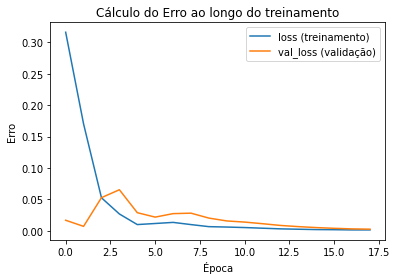

7/7 [==============================] - 1s 5ms/step


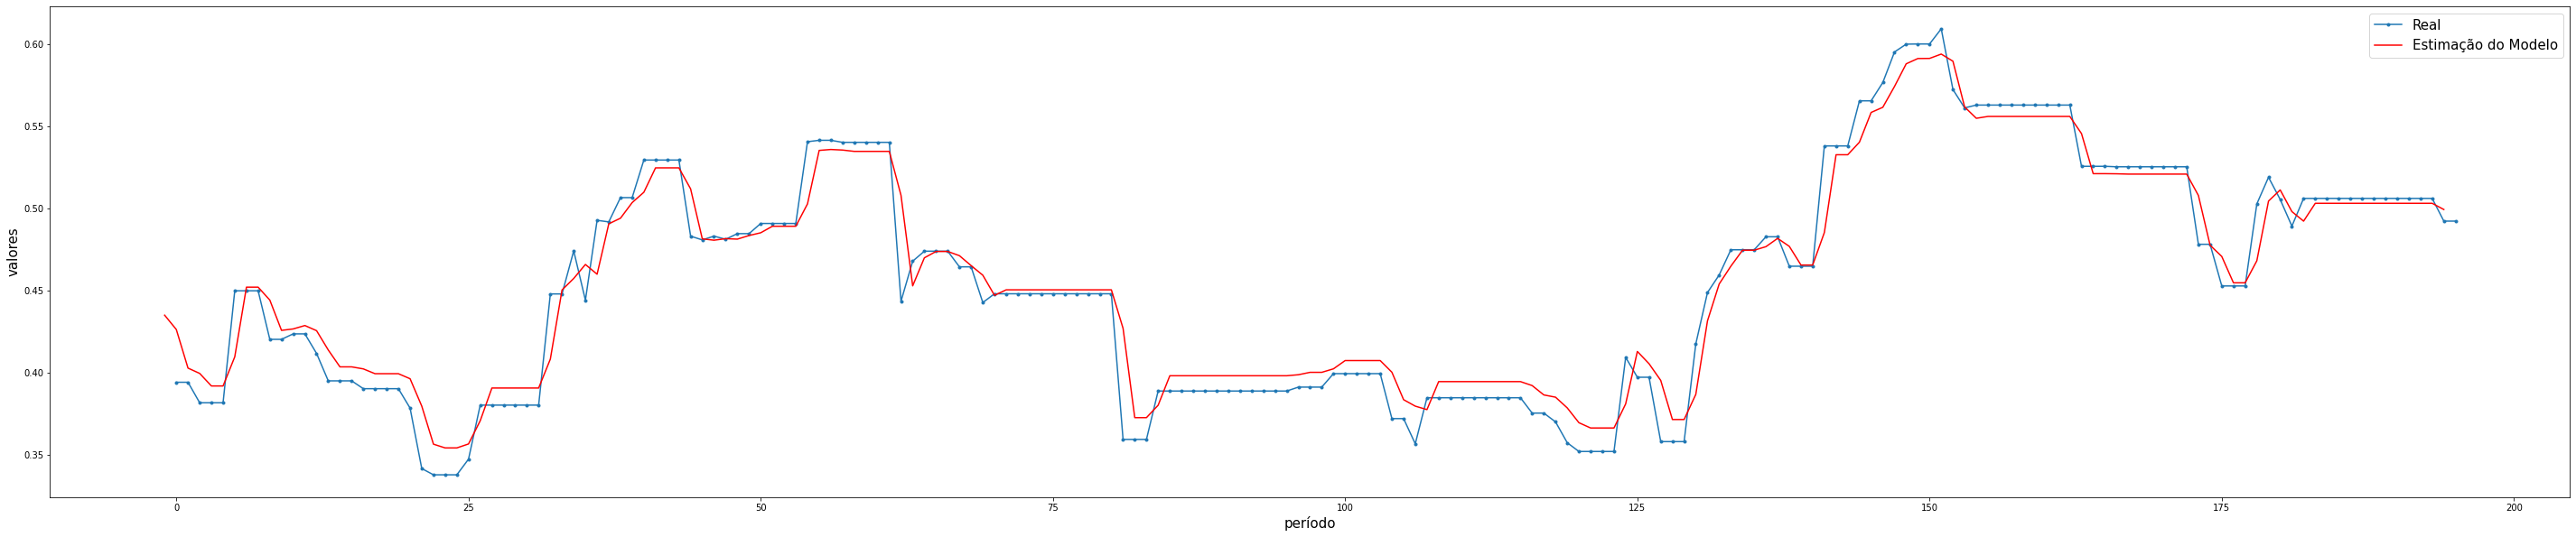

1/1 [==============================] - 2s 2s/step
minha predição é: [[0.17101474]
 [0.16776535]]


In [ ]:
df['Close']['SLBG34.SA']

y=[]
for a in df['Close']['SLBG34.SA']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 18
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

modelo.summary()
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

hist = pd.DataFrame(historico.history)
hist.head()

loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

len(valores_reais_y)


len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0


minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')





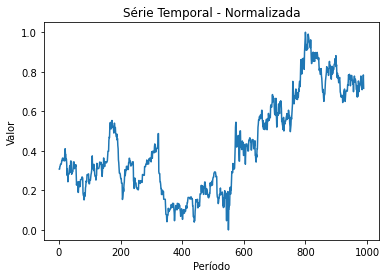

treino[1]: [1.        0.3074416]
treino[2]: [2.         0.30788597]
treino[3]: [3.         0.32121428]
treino[4]: [4.        0.3234357]
treino[5]: [5.         0.33232128]
treino[1]: [[0.3074416 ]
 [0.30788597]] -> 0.32121428096079413
treino[2]: [[0.30788597]
 [0.32121428]] -> 0.32343570298951363
treino[3]: [[0.32121428]
 [0.3234357 ]] -> 0.33232127811817386
treino[4]: [[0.3234357 ]
 [0.33232128]] -> 0.33232127811817386
treino[5]: [[0.33232128]
 [0.33232128]] -> 0.33232127811817386
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_114 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_57 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_115 (LSTM)             (None, 128)               117248    
                             

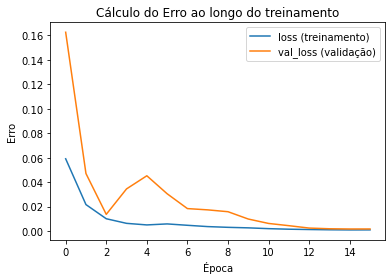

7/7 [==============================] - 1s 7ms/step


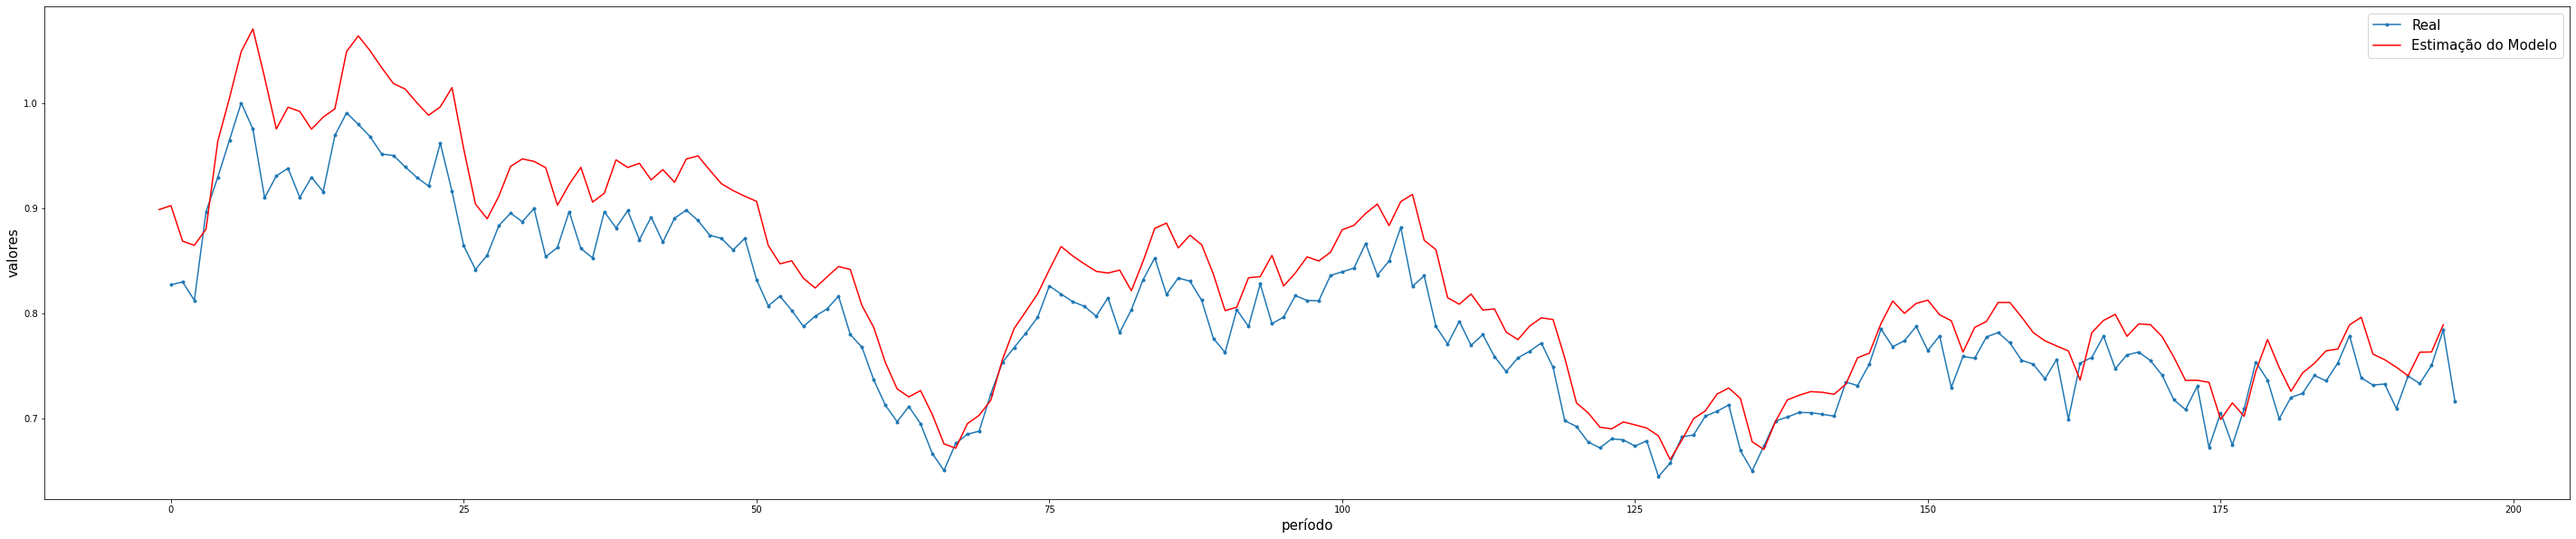

1/1 [==============================] - 1s 1s/step
minha predição é: [[0.23675917]
 [0.24662781]]


In [ ]:
df['Close']['MMMC34.SA']

y=[]
for a in df['Close']['MMMC34.SA']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 16
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

modelo.summary()
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

hist = pd.DataFrame(historico.history)
hist.head()

loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

len(valores_reais_y)


len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0


minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')





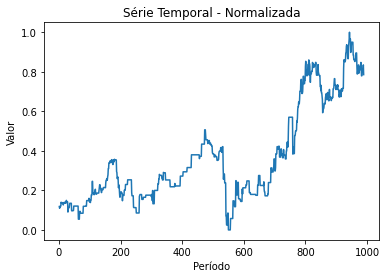

treino[1]: [1.         0.11843015]
treino[2]: [2.         0.10955527]
treino[3]: [3.         0.11497883]
treino[4]: [4.         0.11497883]
treino[5]: [5.         0.12138847]
treino[1]: [[0.11843015]
 [0.10955527]] -> 0.11497883089482616
treino[2]: [[0.10955527]
 [0.11497883]] -> 0.11497883089482616
treino[3]: [[0.11497883]
 [0.11497883]] -> 0.12138847000739993
treino[4]: [[0.11497883]
 [0.12138847]] -> 0.12138847000739993
treino[5]: [[0.12138847]
 [0.12138847]] -> 0.1401243092467867
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_116 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_58 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_117 (LSTM)             (None, 128)               117248    
                          

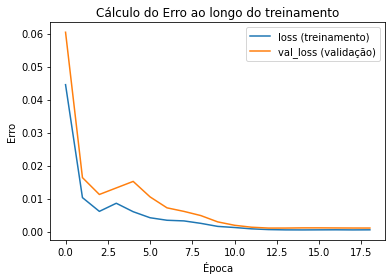

7/7 [==============================] - 1s 7ms/step


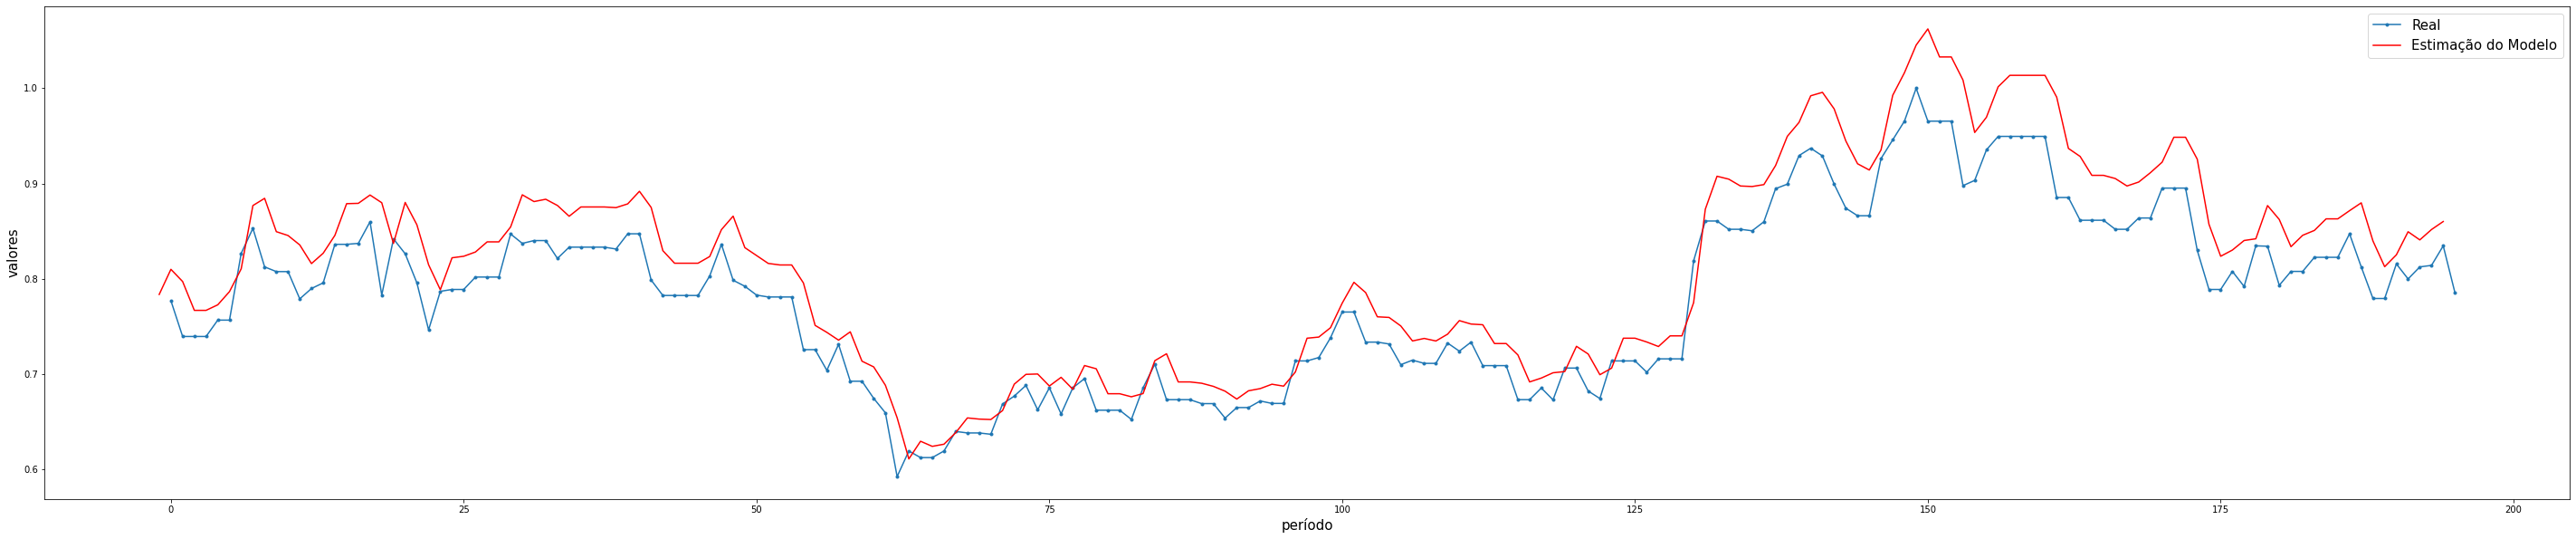

1/1 [==============================] - 1s 1s/step
minha predição é: [[0.2604739]
 [0.266552 ]]


In [ ]:
df['Close']['USBC34.SA']

y=[]
for a in df['Close']['USBC34.SA']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 19
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

modelo.summary()
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

hist = pd.DataFrame(historico.history)
hist.head()

loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

len(valores_reais_y)


len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0


minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')





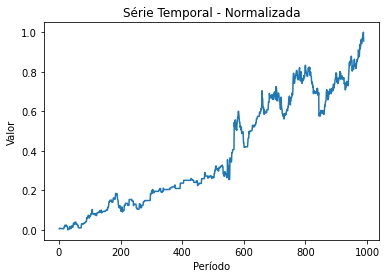

treino[1]: [1.         0.00577664]
treino[2]: [2.         0.00834403]
treino[3]: [3.         0.00706032]
treino[4]: [4.         0.00770217]
treino[5]: [5.         0.00770217]
treino[1]: [[0.00577664]
 [0.00834403]] -> 0.007060317707961474
treino[2]: [[0.00834403]
 [0.00706032]] -> 0.007702174788739719
treino[3]: [[0.00706032]
 [0.00770217]] -> 0.007702174788739719
treino[4]: [[0.00770217]
 [0.00770217]] -> 0.007702174788739719
treino[5]: [[0.00770217]
 [0.00770217]] -> 0.007702174788739719
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_118 (LSTM)             (None, 2, 100)            40800     
                                                                 
 dropout_59 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_119 (LSTM)             (None, 128)               117248    
                    

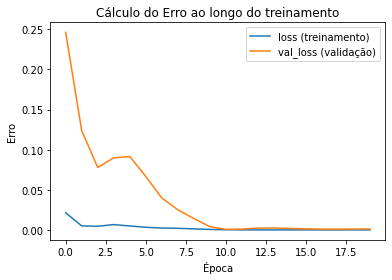

7/7 [==============================] - 1s 5ms/step


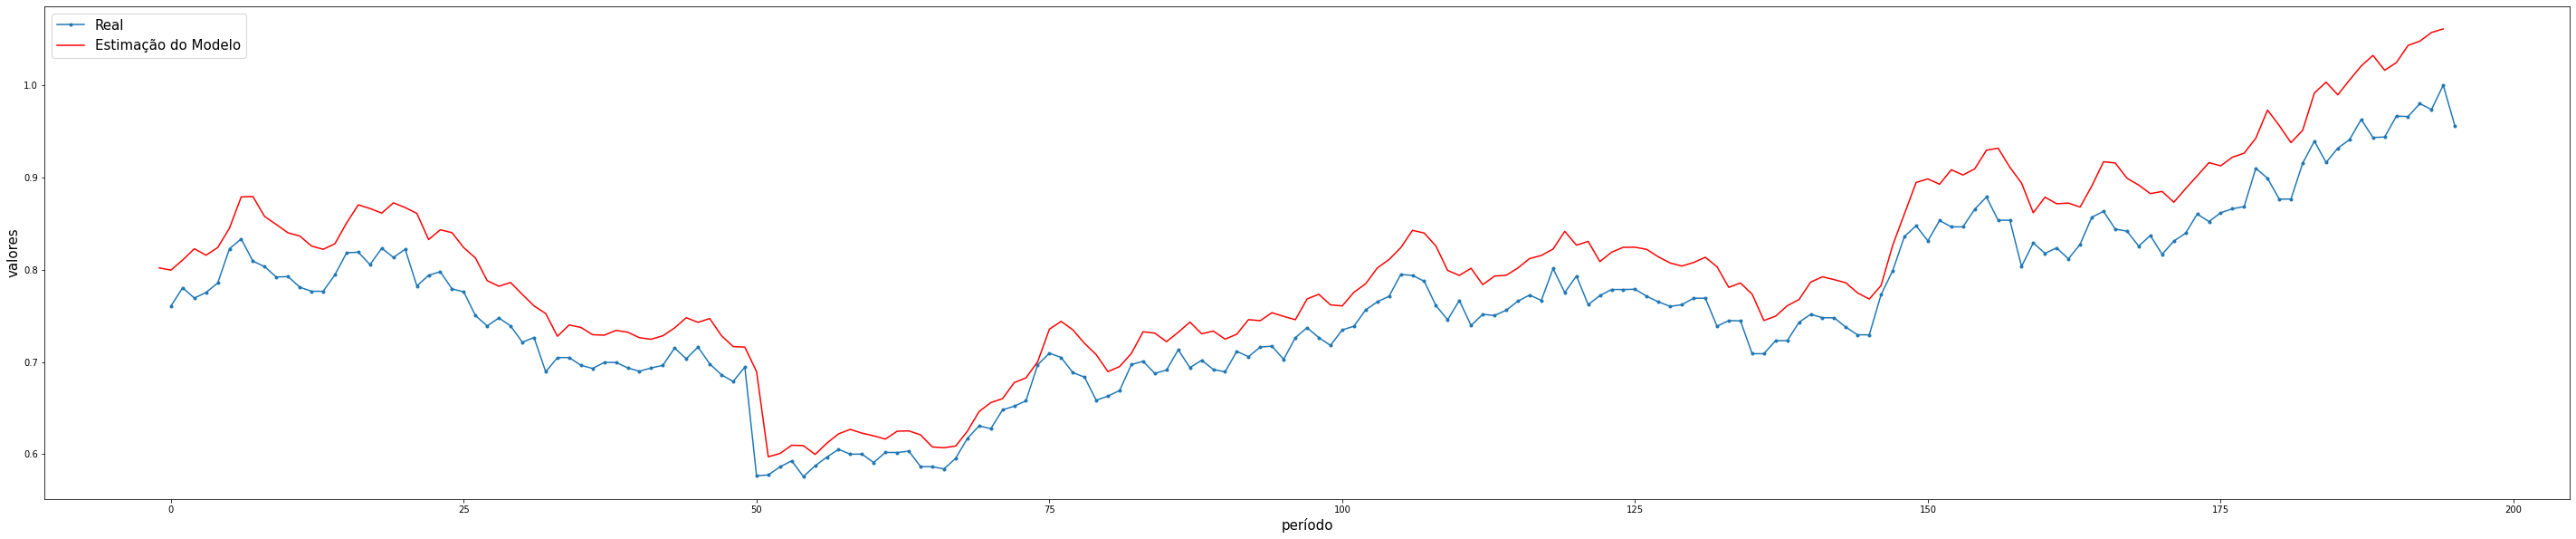

1/1 [==============================] - 1s 1s/step
minha predição é: [[0.31063145]
 [0.31882158]]


In [ ]:
df['Close']['ABTT34.SA']

y=[]
for a in df['Close']['ABTT34.SA']:
  y.append(a)

x = np.arange (1,len(y)+1,1)

minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

modelo.summary()
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

hist = pd.DataFrame(historico.history)
hist.head()

loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

predicao = modelo.predict(x_teste)

look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

len(valores_reais_y)


len(lst_dados_predicao)

n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0


minha_predicao = modelo.predict([x_teste[n-1]])

print(f'minha predição é: {minha_predicao}')





Agora vamos jogar os coeficientes de predição no problema da mochila. 
**KNAPSACK PROBLEM**

In [ ]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mip import Model, maximize, xsum, CBC, BINARY, OptimizationStatus

In [ ]:
coef_funcao_objetivo = [0.30195308,0.29869258, 0.27981928, 0.2980595,0.2665166,0.1674808,0.1708497,0.23528661,0.25823316,0.31494302]
coef_restr_igualdade = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
termos_independentes_igualdade = [3]                   # 3 porque você vai escolher 3 dos 10 ativos para investir

In [ ]:
I = range(len(coef_funcao_objetivo))
m = Model("knapsack")

In [ ]:
x = [m.add_var(var_type=BINARY) for i in I]

In [ ]:
m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))

In [ ]:
n=len(termos_independentes_igualdade)
for k in range(n):
  restricao = xsum(coef_restr_igualdade[k][i] * x[i] for i in I) == termos_independentes_igualdade[k]
  print(restricao)
  m += restricao

+ var(0) + var(1) + var(2) + var(3) + var(4) + var(5) + var(6) + var(7) + var(8) + var(9)  = 3.0


In [ ]:
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões)')

O modelo tem 10 variável(eis), 1 restrição(ões)


In [ ]:
status = m.optimize()

In [ ]:
status == OptimizationStatus.OPTIMAL

True

In [ ]:
itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))

Itens selecionados: ['x1', 'x2', 'x10']


In [ ]:
print(f'Valor da solução ótima = {m.objective_value}')

Valor da solução ótima = 0.9155886799999999


Podemos conferir simplesmente verificando se x1, x2 e x10 são os maiores coeficientes da minha função objetivo. e são!

**logo, devemos escolher as ações : COCA34 (Coca-cola) , COLG34 (Colgate) e ABTT34 (Abbott).**